In [1]:
import numpy as np
import cv2

from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

import joblib

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny))

In [ ]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny))

In [ ]:
x_test.shape

(10000, 784)

# Model Training

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 42)

In [ ]:
dtc.fit(x_train2,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred=dtc.predict(x_test2)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
print(accuracy_score(y_pred,y_test)*100)

78.88


In [ ]:
print(precision_score(y_test, y_pred, average='macro')*100)

79.07944419130592


In [ ]:
print(recall_score(y_test, y_pred, average='macro')*100)

78.88000000000001


In [ ]:
print(f1_score(y_test, y_pred, average='macro')*100)

78.96654287555151


In [ ]:
joblib.dump(dtc, 'D:/STUDY/Supervised Learning/SML CA5/DT.pkl')

['D:/STUDY/Supervised Learning/SML CA5/DT.pkl']

## Voting Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
estimator = []

In [ ]:
estimator.append(('LR', LogisticRegression(solver ='saga', 
                                           multi_class ='multinomial', 
                                           max_iter = 200)))

estimator.append(('SVC', SVC(kernel='linear', gamma =0.001, probability = True)))

estimator.append(('KNN', OneVsRestClassifier(KNeighborsClassifier())))

In [ ]:
from sklearn.ensemble import VotingClassifier
vot_soft = VotingClassifier(estimators = estimator, voting ='soft', verbose=True)

In [ ]:
vot_soft.fit(x_train2,y_train)

D:\SETUP\Anaconda\Anaconda\envs\SYMBIOSIS\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[Voting] ....................... (1 of 3) Processing LR, total= 6.7min
[Voting] ...................... (2 of 3) Processing SVC, total=32.8min
[Voting] ...................... (3 of 3) Processing KNN, total=   0.7s


VotingClassifier(estimators=[('LR',
                              LogisticRegression(max_iter=200,
                                                 multi_class='multinomial',
                                                 solver='saga')),
                             ('SVC',
                              SVC(gamma=0.001, kernel='linear',
                                  probability=True)),
                             ('KNN',
                              OneVsRestClassifier(estimator=KNeighborsClassifier()))],
                 verbose=True, voting='soft')

In [ ]:
y_pred_VC=vot_soft.predict(x_test2)
y_pred_VC

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
print(accuracy_score(y_pred_VC,y_test)*100)

87.17


In [ ]:
print(precision_score(y_pred_VC,y_test,average='macro')*100)

87.16999999999999


In [ ]:
print(recall_score(y_pred_VC,y_test,average='macro')*100)

87.11401609925049


In [ ]:
print(f1_score(y_pred_VC,y_test,average='macro')*100)

87.11221001595494


In [ ]:
joblib.dump(vot_soft, 'D:/STUDY/Supervised Learning/SML CA5/VTC.pkl')

['D:/STUDY/Supervised Learning/SML CA5/VTC.pkl']

## Stacking Classifier

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier

In [ ]:
knn = OneVsRestClassifier(KNeighborsClassifier())
NB = GaussianNB()  

In [ ]:
model_KNC=knn.fit(x_train2, y_train)   

In [ ]:
pred_knc = model_KNC.predict(x_test2) 

In [ ]:
print('Accuracy score of KNeighbors Classifier is:', (accuracy_score(y_test, pred_knc)) * 100)

Accuracy score of KNeighbors Classifier is: 85.16


In [ ]:
model_NB = NB.fit(x_train2, y_train)
pred_nb = model_NB.predict(x_test2)

In [ ]:
print('Accuracy of Naive Bayes Classifier:', (accuracy_score(y_test, pred_nb)) * 100)

Accuracy of Naive Bayes Classifier: 58.56


In [ ]:
lr = LogisticRegression(solver ='saga', multi_class ='multinomial', max_iter = 200)  
clf_stack = StackingClassifier(classifiers =[knn, NB], meta_classifier = lr, use_probas = True, use_features_in_secondary = True)

In [ ]:
model_stack = clf_stack.fit(x_train2, y_train)  

D:\SETUP\Anaconda\Anaconda\envs\SYMBIOSIS\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
ypred_stack = model_stack.predict(x_test2) 

In [ ]:
print('Accuracy score of Stacked model:', (accuracy_score(y_test, ypred_stack)) * 100)

Accuracy score of Stacked model: 87.08


In [ ]:
print(f1_score(y_test, ypred_stack, average='macro')*100)

87.12654088506083


In [ ]:
print(recall_score(y_test, ypred_stack, average='macro')*100)

87.08


In [ ]:
print(precision_score(y_test, ypred_stack, average='macro')*100)

87.20819823818319


In [ ]:
joblib.dump(model_stack, 'D:/STUDY/Supervised Learning/SML CA5/STACK.pkl')

['D:/STUDY/Supervised Learning/SML CA5/STACK.pkl']

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(x_train2,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf=rf.predict(x_test2)
y_pred_rf

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
print(accuracy_score(y_pred_rf,y_test)*100)

87.72


In [ ]:
print(precision_score(y_pred_rf,y_test,average='macro')*100)

87.72


In [ ]:
print(recall_score(y_pred_rf,y_test,average='macro')*100)

87.62249179675943


In [ ]:
print(f1_score(y_pred_rf,y_test,average='macro')*100)

87.58087972313547


In [ ]:
joblib.dump(rf, 'D:/STUDY/Supervised Learning/SML CA5/RF.pkl')

['D:/STUDY/Supervised Learning/SML CA5/RF.pkl']

## AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50,learning_rate=1,random_state = 0)

In [ ]:
ada.fit(x_train2,y_train)

AdaBoostClassifier(learning_rate=1, random_state=0)

In [ ]:
y_pred_ada=ada.predict(x_test2)
y_pred_ada

array([7, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
print(accuracy_score(y_pred_ada,y_test)*100)

54.25


In [ ]:
print(precision_score(y_pred_ada,y_test,average='macro')*100)

54.25


In [ ]:
print(recall_score(y_pred_ada,y_test,average='macro')*100)

56.12784019025104


In [ ]:
print(f1_score(y_pred_ada,y_test,average='macro')*100)

51.82906120607471


In [ ]:
joblib.dump(ada, 'D:/STUDY/Supervised Learning/SML CA5/ADA.pkl')

['D:/STUDY/Supervised Learning/SML CA5/ADA.pkl']

# Model Testing

In [ ]:
type(x_test[32]),x_test[32].shape

(numpy.ndarray, (28, 28))

## Decision Tree

Predicted:  [3]
Actual:  3


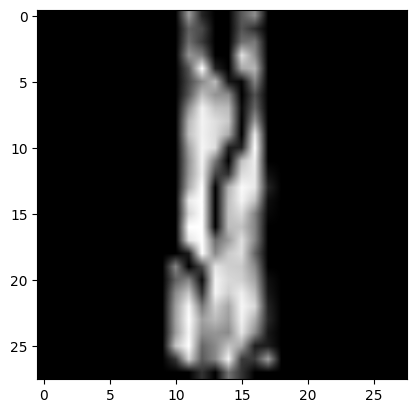

In [ ]:
pre = x_test[32].reshape(1, -1)
y_pred_1 = dtc.predict(pre)

p = plt.subplot(1,1,1)
p.imshow(x_test[32], cmap=plt.cm.gray, interpolation='bilinear')

print("Predicted: ",y_pred_1)
print("Actual: ",y_test[32])

In [ ]:
pre.shape

(1, 784)

## Voting Classifier

Predicted:  [5]
Actual:  5


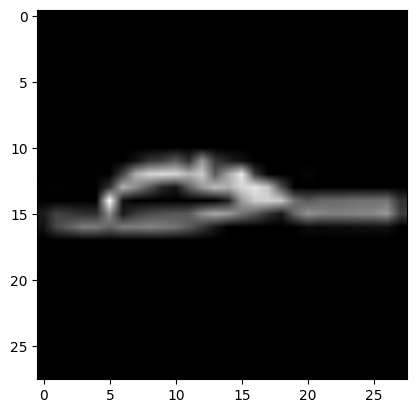

In [ ]:
pre = x_test[8].reshape(1, -1)
y_pred_2 = vot_soft.predict(pre)

p = plt.subplot(1,1,1)
p.imshow(x_test[8], cmap=plt.cm.gray, interpolation='bilinear')

print("Predicted: ",y_pred_2)
print("Actual: ",y_test[8])

## Stacking Classifier

Predicted:  [1]
Actual:  1


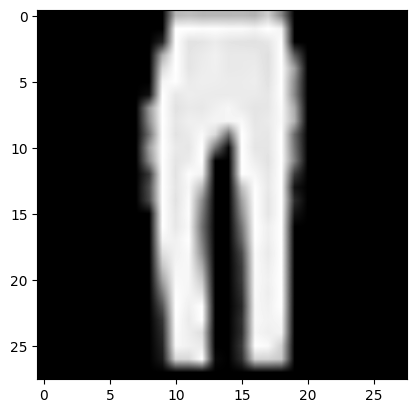

In [ ]:
pre = x_test[64].reshape(1, -1)
y_pred_2 = model_stack.predict(pre)

p = plt.subplot(1,1,1)
p.imshow(x_test[64], cmap=plt.cm.gray, interpolation='bilinear')

print("Predicted: ",y_pred_2)
print("Actual: ",y_test[64])

## Random Forest Classifier

Predicted:  [1]
Actual:  1


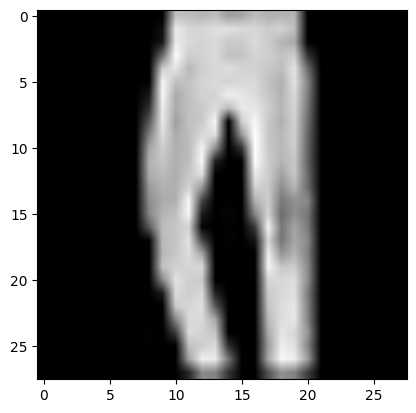

In [ ]:
pre = x_test[5].reshape(1, -1)
y_pred_4 = rf.predict(pre)

p = plt.subplot(1,1,1)
p.imshow(x_test[5], cmap=plt.cm.gray, interpolation='bilinear')

print("Predicted: ",y_pred_4)
print("Actual: ",y_test[5])

## AdaBoost Classifier

Predicted:  [4]
Actual:  2


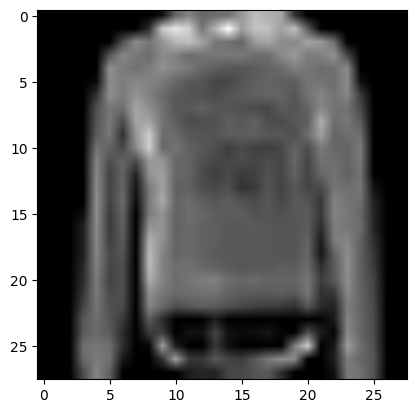

In [ ]:
pre = x_test[16].reshape(1, -1)
y_pred_5 = ada.predict(pre)

p = plt.subplot(1,1,1)
p.imshow(x_test[16], cmap=plt.cm.gray, interpolation='bilinear')

print("Predicted: ",y_pred_5)
print("Actual: ",y_test[16])